<a href="https://colab.research.google.com/github/Arif24434/Web-Scraping-project-Housing-data-collection-from-a-real-estate-website/blob/main/Final__Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

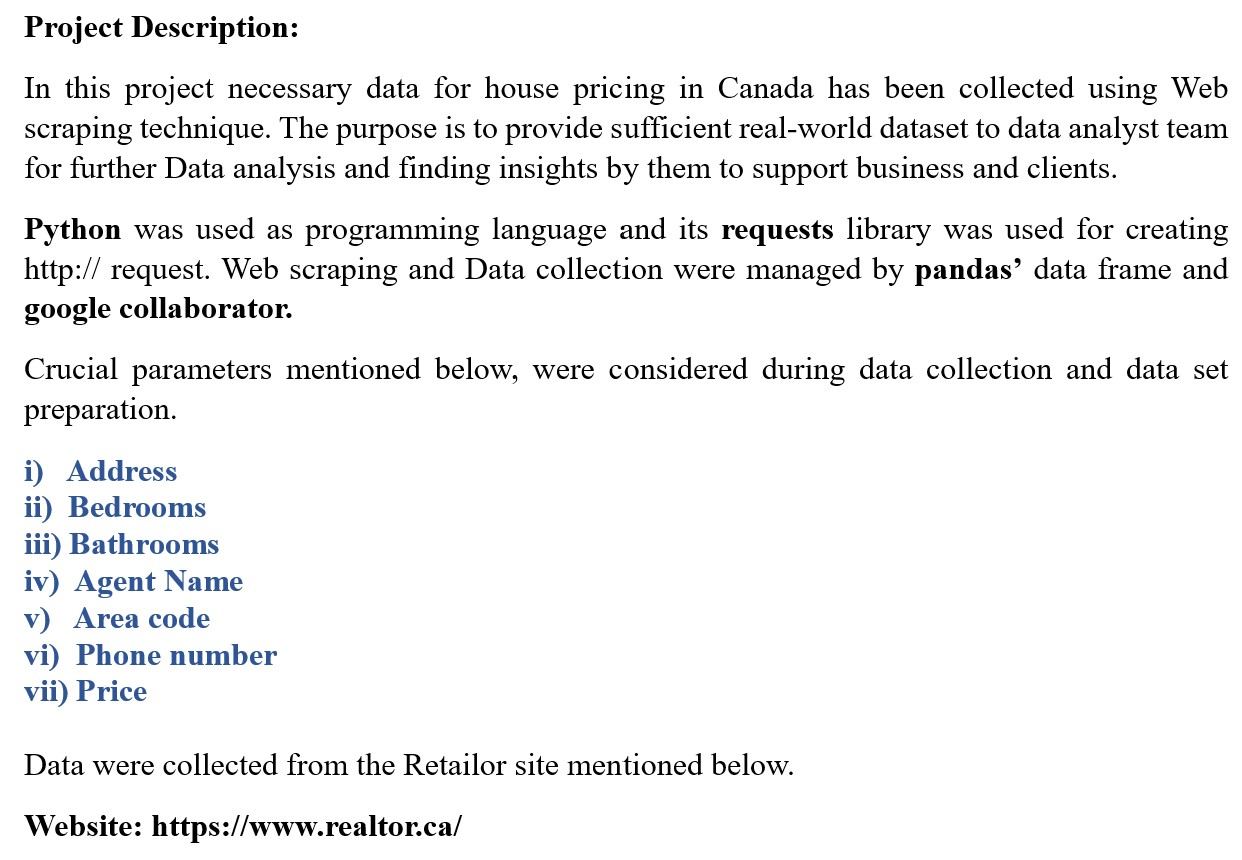


In [ ]:
!pip install requests
!pip install mysql-connector-python
!pip install pandas sqlalchemy # for mysql database
import requests    # I have imported request library
import pandas as pd   # I have imported


In [ ]:
# here is the curl address copied from website and converted from curl to python request by converter.

headers = {
    'authority': 'api2.realtor.ca',
    'accept': '*/*',
    'accept-language': 'en,en-US;q=0.9,pl;q=0.8,bn;q=0.7',
    'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'cookie': 'visid_incap_2269415=Fv7xWovoRyqagWufx87A6ZI87mQAAAAAQUIPAAAAAACJOqsSckarSs12jPUO2sWW; _gcl_au=1.1.1840761251.1693334680; _gid=GA1.2.1536776699.1693334680; gig_bootstrap_3_mrQiIl6ov44s2X3j6NGWVZ9SDDtplqV7WgdcyEpGYnYxl7ygDWPQHqQqtpSiUfko=gigya-pr_ver4; visid_incap_2271082=5MyPd14gSLqsSMI9pFq8v6E87mQAAAAAQUIPAAAAAABm4RhniIIY8UirvxYKTxok; nlbi_2269415=fLk+H0LDDTuvfjJ+Z/XrMgAAAAAk0Xn5nKcaen5FTn6S7ThJ; ASP.NET_SessionId=aoy3pkgkbpqymmketwp4y34f; nlbi_2271082=E7mRIZTy00IkrW1jVPrQ3QAAAAAet9dAhSrY7qPYd84jmTMn; reese84=3:I3Sf5+lsWKH6qR9WJt3xbA==:rjnhaWaAsvcJJyNVbCkPy6DFG6zwHvUufpFoynknIS0ho3Hho2urT1+LqUqdPlNziwj1XeXiAddejbe/N/UFOCB2McUOFru/ZO7bmMSz86vUd7hBaCFu89/mjUggrZL+kjHaNroCsOWKMa0ARbKG5yzND0U47uv2AWLAu3fShhTRi2oyOGcE1R07Sl4yTm0g7JtueAWxtS8px6fzOGNvO/YskHqz9ih+rtuVObKpH0GFdFfeh5xuBRLQzkSWAZwwx6EHBfsYDinjA74m1Kq9SX0yknTIbUVD5pKT9O1kmMNYt8CHuWk0H8qm0tySJeoSc9gccLc0BjVHyHKtkuLSEl0SEDoR6FtfWOsXAH9NOA8rFJce4iZKKfq9Y1KmCXA6v1fOrJufk7L9lEnEg6TLj2FddxgWV7dAPhj6KSk8TiLRlTiWapgb93K2WNlzHS+xtILrKA++D7CVCOF36+nR5w==:ORqkKFJRY+wtZ3yqXPY1wobtfjIxPu7lmvWi0Qk3QZE=; incap_ses_519_2269415=6YTRZoITeDNcPqLH4NwzB2Ul72QAAAAAbr7fMG3FvnTzZZEQteyjqw==; incap_ses_519_2271082=52bCYl8wlU0pQKLH4NwzB2gl72QAAAAAc7zNNlRWtYkpIWowi3VpTA==; nlbi_2269415_2147483392=pj7cajmrPlEw/jX6Z/XrMgAAAAAogu8LIRECyHMrdyOd3Tmq; _ga_Y07J3B53QP=GS1.1.1693394279.6.1.1693394528.59.0.0; _ga=GA1.1.1186701658.1693334680; _4c_=^%^7B^%^22_4c_s_^%^22^%^3A^%^22lVRda9swFP0rxWN5qlJ9WR^%^2BFPIwURqGDsXUM9lIUSU5MHcvISryu5L^%^2Fvyk3idR8PM8GRjs49ks6918^%^2FFsPFtcU2EZkzzkhEm^%^2BGXx6J^%^2F64vq5iLXLf^%^2FviuqBOCMy0QVrKCnFBLdJ4RZEVrCIVXemVYsVl8R20JCaEYKGwFPJwWdjuqPFc2OA8aBE9hx9GVQ8R6UdGKIZhF4Pb2fSQnrpMG^%^2FzqonePsOD8vrb^%^2BYahd2mQ253hCN75ebxLAGo9oF^%^2FNxYTTUrQvD71FH9BwleT73Koah9zlyuYlh6y8IEQAHsKH4Okbks0Zf^%^2BRhHGsz6OuVjRm^%^2BaFOLcmiMG7k0wGuE70653Zj1ePk^%^2FDeu3dxS04X1Sm6T1gH2PY1631L9rLsGtTzDofQ2NaB9An39fOt6k2TYjLsN36WFvTjFudV7KLOV0SBk2A5awHGb6EV8a7mKXev3v4cnuTD0OUgHSJUs3HEmAc0gaEXcy6m5S6^%^2FvrqahiG^%^2BXTLq63p3nwLYXvn975Z8NkStvZxUfK5plhR9ZYukdZzRgTHYnZnUp12zn8w3xeiBArHcnYX2vUZRSWeK4ylmrh1u2A6gwT^%^2FwgUUES7nilHMZp9DTAuBbmbgXOdjerqHsnkfw667vVmQ2X00bW9sqkObF27dgp6Zn72JdnOE8Wy5g6S29mmxfHeTc^%^2BjHqCmHgN3HGlIWP^%^2Fi0CdATMDeuzqzRcpfJzldm16Q8zXVlG9P3tXW^%^2Bf0yhKw4vvQEmc4U11QorqP0ENiuwKT^%^2BHl9SNrSIntmSsZJTTP9lHaXSqNN^%^2F^%^2Bb3x16m5OtbFWCyRNRREhPne3EwhDoLHQnRifunvSVOQvmu1JcrLj9E0QVOcoBbS6S0feWHZK6LLEjLzmZiRzz4rFX9fjMEmVWipdCib5a2pGsr^%^2Fx913^%^2FSd1P21YCK0w0clJTxGVJ0YooieSKakElw17xyRumBdxRan70hqgXaw6Hnw^%^3D^%^3D^%^22^%^7D; _gali=select2-16g1-container',
    'origin': 'https://www.realtor.ca',
    'referer': 'https://www.realtor.ca/',
    'sec-ch-ua': '^\\^Chromium^\\^;v=^\\^116^\\^, ^\\^Not)A;Brand^\\^;v=^\\^24^\\^, ^\\^Google',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '^\\^Windows^\\^',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
}

data = {
  'ZoomLevel': '9',
  'LatitudeMax': '45.74413',
  'LongitudeMax': '-74.28384',
  'LatitudeMin': '44.75218',
  'LongitudeMin': '-77.31606',
  'Sort': '6-D',
  'PropertyTypeGroupID': '1',
  'TransactionTypeId': '2',
  'PropertySearchTypeId': '0',
  'Currency': 'CAD',
  'RecordsPerPage': '12',
  'ApplicationId': '1',
  'CultureId': '1',
  'Version': '7.0',
  'CurrentPage': '1'# data for first web page
}

response = requests.post('https://api2.realtor.ca/Listing.svc/PropertySearch_Post', headers=headers, data=data)

In [ ]:
response   # we have runned  response variable that shows 200 it means we made a successfull HTTP request

In [ ]:
# Creating a json object to find all necessary information for 1st page where we created request.
result_json = response.json()
result_json


In [ ]:
# creating a Key to setect and detect elements easily inside the requested page elements
result_json.keys()


In [ ]:
#selecting the "Results" key from the printed keys because our necessary item will be inside this key.
len(result_json['Results']) # We have checked that the element of 1st web page was 12 and here is also 12. so code works properly.
result_items = result_json['Results']
result_items

In [ ]:
# Grabbing and Collecting Data From first item of first page
result_items[0]

In [ ]:
# Grabbing and Collecting Address
result_items[0]['Property']['Address']['AddressText']

In [ ]:
## Grabbing and Collecting Bedrooms
result_items[0]['Building']['Bedrooms']


In [ ]:
## ## Grabbing and Collecting Bathrooms
result_items[0]['Building']['BathroomTotal']

In [ ]:
## Grabbing and Collecting Agent Name
result_items[0]['Individual'][0]['Name']

In [ ]:
## Grabbing and Collecting Area Code
result_items[0]['Individual'][0]['Phones'][0]['AreaCode']

In [ ]:
## Grabbing and Collecting Phone number
result_items[0]['Individual'][0]['Phones'][0]['PhoneNumber']

In [ ]:
## Grabbing and Collecting Price
result_items[0]['Property']['Price']

In [ ]:
#Grabbing Data from All item of FirstPage
address = []
bedrooms = []
bathrooms = []
agent_name = []
area_code  = []
phone_number = []
price = []

for result in result_items:
    try:
        # address
        address.append(result['Property']['Address']['AddressText'])
    except:
        address.append(' ')
    try:
        # bedrooms
        bedrooms.append(result['Building']['Bedrooms'])
    except:
        bedrooms.append(' ')

    try:
        # bathrooms
        bathrooms.append(result['Building']['BathroomTotal'])
    except:
        bathrooms.append(' ')

    try:
        # agent name
        agent_name.append(result['Individual'][0]['Name'])
    except:
        agent_name.append(' ')

    try:
        # area code
        area_code.append(result['Individual'][0]['Phones'][0]['AreaCode'])
    except:
        area_code.append(' ')

    try:
        # phone number
        phone_number.append(result['Individual'][0]['Phones'][0]['PhoneNumber'])
    except:
        phone_number.append(' ')

    try:
        # price
        price.append(result['Property']['Price'])
    except:
        price.append(' ')



In [ ]:
len(address) # checking the no. of item inside address variable list to ensure that we have all 12 address to check our code


In [ ]:
address # printing the variable to see the all address to check our code

In [ ]:
# creating pandas Dataframe from grabbed information for item of first page:
df_retail_data_1st_page = pd.DataFrame({'Address':address,'Bedrooms':bedrooms,'Bathrooms':bathrooms,'Agnen Name':agent_name,'Area Code':area_code,
                              'Telephone number':phone_number,'Price':price})
df_retail_data_1st_page

In [ ]:
# creating for loop to grab info from  multiple page:
# Grabbing Data from All item of FirstPage to next all
import requests
address = []
bedrooms = []
bathrooms = []
agent_name = []
area_code = []
phone_number = []
price = []

for i in range(1, 51):  # a for loop to grab all data from first page to all page
    headers = {
        'authority': 'api2.realtor.ca',
    'accept': '*/*',
    'accept-language': 'en,en-US;q=0.9,pl;q=0.8,bn;q=0.7',
    'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'cookie': 'visid_incap_2269415=Fv7xWovoRyqagWufx87A6ZI87mQAAAAAQUIPAAAAAACJOqsSckarSs12jPUO2sWW; _gcl_au=1.1.1840761251.1693334680; _gid=GA1.2.1536776699.1693334680; gig_bootstrap_3_mrQiIl6ov44s2X3j6NGWVZ9SDDtplqV7WgdcyEpGYnYxl7ygDWPQHqQqtpSiUfko=gigya-pr_ver4; visid_incap_2271082=5MyPd14gSLqsSMI9pFq8v6E87mQAAAAAQUIPAAAAAABm4RhniIIY8UirvxYKTxok; nlbi_2269415=fLk+H0LDDTuvfjJ+Z/XrMgAAAAAk0Xn5nKcaen5FTn6S7ThJ; ASP.NET_SessionId=aoy3pkgkbpqymmketwp4y34f; nlbi_2271082=E7mRIZTy00IkrW1jVPrQ3QAAAAAet9dAhSrY7qPYd84jmTMn; reese84=3:I3Sf5+lsWKH6qR9WJt3xbA==:rjnhaWaAsvcJJyNVbCkPy6DFG6zwHvUufpFoynknIS0ho3Hho2urT1+LqUqdPlNziwj1XeXiAddejbe/N/UFOCB2McUOFru/ZO7bmMSz86vUd7hBaCFu89/mjUggrZL+kjHaNroCsOWKMa0ARbKG5yzND0U47uv2AWLAu3fShhTRi2oyOGcE1R07Sl4yTm0g7JtueAWxtS8px6fzOGNvO/YskHqz9ih+rtuVObKpH0GFdFfeh5xuBRLQzkSWAZwwx6EHBfsYDinjA74m1Kq9SX0yknTIbUVD5pKT9O1kmMNYt8CHuWk0H8qm0tySJeoSc9gccLc0BjVHyHKtkuLSEl0SEDoR6FtfWOsXAH9NOA8rFJce4iZKKfq9Y1KmCXA6v1fOrJufk7L9lEnEg6TLj2FddxgWV7dAPhj6KSk8TiLRlTiWapgb93K2WNlzHS+xtILrKA++D7CVCOF36+nR5w==:ORqkKFJRY+wtZ3yqXPY1wobtfjIxPu7lmvWi0Qk3QZE=; incap_ses_519_2269415=6YTRZoITeDNcPqLH4NwzB2Ul72QAAAAAbr7fMG3FvnTzZZEQteyjqw==; incap_ses_519_2271082=52bCYl8wlU0pQKLH4NwzB2gl72QAAAAAc7zNNlRWtYkpIWowi3VpTA==; nlbi_2269415_2147483392=pj7cajmrPlEw/jX6Z/XrMgAAAAAogu8LIRECyHMrdyOd3Tmq; _ga_Y07J3B53QP=GS1.1.1693394279.6.1.1693394528.59.0.0; _ga=GA1.1.1186701658.1693334680; _4c_=^%^7B^%^22_4c_s_^%^22^%^3A^%^22lVRda9swFP0rxWN5qlJ9WR^%^2BFPIwURqGDsXUM9lIUSU5MHcvISryu5L^%^2Fvyk3idR8PM8GRjs49ks6918^%^2FFsPFtcU2EZkzzkhEm^%^2BGXx6J^%^2F64vq5iLXLf^%^2FviuqBOCMy0QVrKCnFBLdJ4RZEVrCIVXemVYsVl8R20JCaEYKGwFPJwWdjuqPFc2OA8aBE9hx9GVQ8R6UdGKIZhF4Pb2fSQnrpMG^%^2FzqonePsOD8vrb^%^2BYahd2mQ253hCN75ebxLAGo9oF^%^2FNxYTTUrQvD71FH9BwleT73Koah9zlyuYlh6y8IEQAHsKH4Okbks0Zf^%^2BRhHGsz6OuVjRm^%^2BaFOLcmiMG7k0wGuE70653Zj1ePk^%^2FDeu3dxS04X1Sm6T1gH2PY1631L9rLsGtTzDofQ2NaB9An39fOt6k2TYjLsN36WFvTjFudV7KLOV0SBk2A5awHGb6EV8a7mKXev3v4cnuTD0OUgHSJUs3HEmAc0gaEXcy6m5S6^%^2FvrqahiG^%^2BXTLq63p3nwLYXvn975Z8NkStvZxUfK5plhR9ZYukdZzRgTHYnZnUp12zn8w3xeiBArHcnYX2vUZRSWeK4ylmrh1u2A6gwT^%^2FwgUUES7nilHMZp9DTAuBbmbgXOdjerqHsnkfw667vVmQ2X00bW9sqkObF27dgp6Zn72JdnOE8Wy5g6S29mmxfHeTc^%^2BjHqCmHgN3HGlIWP^%^2Fi0CdATMDeuzqzRcpfJzldm16Q8zXVlG9P3tXW^%^2Bf0yhKw4vvQEmc4U11QorqP0ENiuwKT^%^2BHl9SNrSIntmSsZJTTP9lHaXSqNN^%^2F^%^2Bb3x16m5OtbFWCyRNRREhPne3EwhDoLHQnRifunvSVOQvmu1JcrLj9E0QVOcoBbS6S0feWHZK6LLEjLzmZiRzz4rFX9fjMEmVWipdCib5a2pGsr^%^2Fx913^%^2FSd1P21YCK0w0clJTxGVJ0YooieSKakElw17xyRumBdxRan70hqgXaw6Hnw^%^3D^%^3D^%^22^%^7D; _gali=select2-16g1-container',
    'origin': 'https://www.realtor.ca',
    'referer': 'https://www.realtor.ca/',
    'sec-ch-ua': '^\\^Chromium^\\^;v=^\\^116^\\^, ^\\^Not)A;Brand^\\^;v=^\\^24^\\^, ^\\^Google',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '^\\^Windows^\\^',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        # ... other headers ...
    }

    data = {
        'ZoomLevel': '9',
        'LatitudeMax': '45.74413',
        'LongitudeMax': '-74.28384',
        'LatitudeMin': '44.75218',
        'LongitudeMin': '-77.31606',
        'Sort': '6-D',
        'PropertyTypeGroupID': '1',
        'TransactionTypeId': '2',
        'PropertySearchTypeId': '0',
        'Currency': 'CAD',
        'RecordsPerPage': '12',
        'ApplicationId': '1',
        'CultureId': '1',
        'Version': '7.0',
        'CurrentPage': str(i),
    }
    data['CurrentPage'] = str(i)
    response = requests.post('https://api2.realtor.ca/Listing.svc/PropertySearch_Post', headers=headers, data=data)

    # json Object
    result_json = response.json()
    # Result Items
    result_items = result_json['Results']
    print(f"Page: {i}, Number of Results: {len(result_items)}")

    for result in result_items:
        try:
            # address
            address.append(result['Property']['Address']['AddressText'])
        except:
            address.append(' ')
        try:
            # bedrooms
            bedrooms.append(result['Building']['Bedrooms'])
        except:
            bedrooms.append(' ')

        try:
            # bathrooms
            bathrooms.append(result['Building']['BathroomTotal'])
        except:
            bathrooms.append(' ')

        try:
            # agent name
            agent_name.append(result['Individual'][0]['Name'])
        except:
            agent_name.append(' ')

        try:
            # area code
            area_code.append(result['Individual'][0]['Phones'][0]['AreaCode'])
        except:
            area_code.append(' ')

        try:
            # phone number
            phone_number.append(result['Individual'][0]['Phones'][0]['PhoneNumber'])
        except:
            phone_number.append(' ')

        try:
            # price
            price.append(result['Property']['Price'])
        except:
            price.append(' ')




In [ ]:
# creating pandas Dataframe from grabbed information for item of first to all page:
df_retail_data_all_page = pd.DataFrame({'Address':address,'Bedrooms':bedrooms,'Bathrooms':bathrooms,'Agnen Name':agent_name,'Area Code':area_code,
                               'Telephone number':phone_number,'Price':price})
df_retail_data_all_page

In [ ]:
# saving all data in CSV file.
df_retail_data_all_page.to_excel('retail_data_all_page.xlsx',index=False)
#%pwd

In [ ]:
#Optional: If it is important to store database in online.
import sqlalchemy
#create a aqlalchemy engine
from sqlalchemy import create_engine

# MySQL database credentials
username = "YourUserName"
password = "YourPassword"
host = "YourIP  # Use the IP address of the machine where MySQL is running
#port = "YourPort"
database_name = "Web_Scrapping"  # Update with  desired new database name

# Construct the connection URL
connection_url = f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database_name}"

# Create an SQLAlchemy engine with the connection URL
engine = create_engine(connection_url)

# Connect to MySQL and execute SQL command to create the new database
with engine.connect() as connection:
    connection.execute(f"CREATE DATABASE IF NOT EXISTS {database_name}")

print(f"Database '{database_name}' created successfully!")


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')